In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3BoaWx0cGF0dG9uL3NvdXJjZS9yZXBvcy9waGlscGF0dG9uLmdpdGh1Yi5pbw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/importlib/_bootstrap.py": 1756909683.181072, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/importlib/_bootstrap_external.py": 1756909683.1840236, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/zipimport.py": 1756909682.1390634, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/codecs.py": 1756909681.7841098, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/encodings/aliases.py": 1756909682.4869266, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/encodings/__init__.py": 1756909682.467157, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/encodings/utf_8.py": 1756909682.8301048, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/abc.py": 1756909681.751164, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/io.py": 1756909681.8854132, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/stat.py": 1756909682.0489361, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/_collections_abc.py": 175

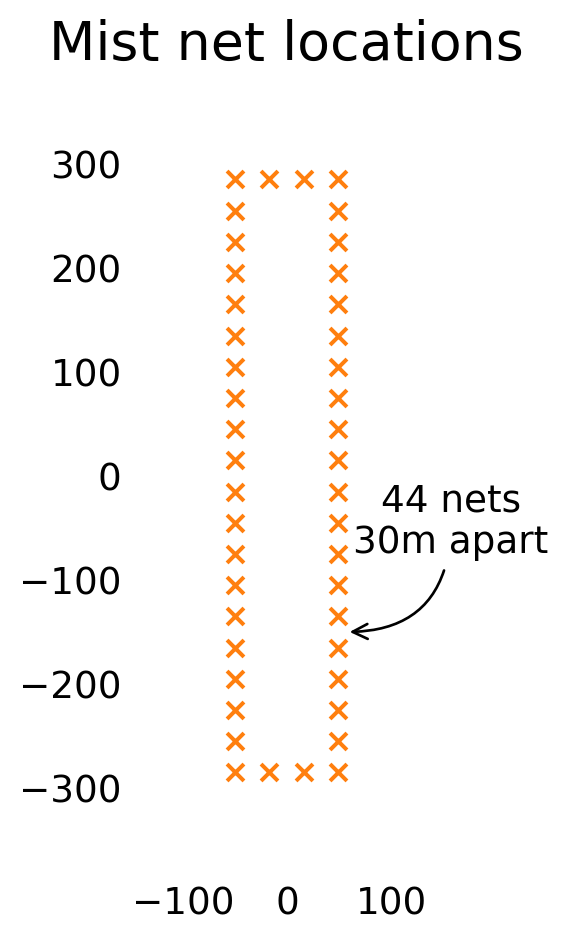

In [2]:
#| fig-cap: Locations of the mist nets in the ovenbird dataset [@efford2004]
#| label: fig-nets

%config InlineBackend.figure_format = 'retina'

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_extras as pmx
import pytensor.tensor as pt
import seaborn as sns

# only necessary on MacOS Sequoia
# https://discourse.pymc.io/t/pytensor-fails-to-compile-model-after-upgrading-to-mac-os-15-4/16796/5
import pytensor
pytensor.config.cxx = '/usr/bin/clang++'

# hyper parameters
SEED = 42
RNG = np.random.default_rng(SEED)
BUFFER = 100
M = 200

# plotting defaults
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
sns.set_palette("tab10")

def invlogit(x):
    '''Inverse logit function'''
    return 1 / (1 + np.exp(-x))

def euclid_dist(X, S, library='np'):
    '''Pairwise euclidian distance between points in (M, 2) and (N, 2) arrays'''
    diff = X[np.newaxis, :, :] - S[:, np.newaxis, :]

    if library == 'np':
        return np.sqrt(np.sum(diff ** 2, axis=-1))

    elif library == 'pm':
        return pm.math.sqrt(pm.math.sum(diff ** 2, axis=-1))

def half_normal(d, s, library='np'):
    '''Half normal detection function.'''
    if library == 'np':
        return np.exp( - (d ** 2) / (2 * s ** 2))

    elif library == 'pm':
        return pm.math.exp( - (d ** 2) / (2 * s ** 2))

def exponential(d, s, library='np'):
    '''Negative exponential detection function.'''
    if library == 'np':
        return np.exp(- d / s)

    elif library == 'pm':
        return pm.math.exp(- d / s)

# coordinates for each trap
ovenbird_trap = pd.read_csv('ovenbirdtrap.txt', delimiter=' ')
trap_count, _ = ovenbird_trap.shape

# information about each trap
trap_x = ovenbird_trap.x
trap_y = ovenbird_trap.y
X = ovenbird_trap[['x', 'y']].to_numpy()

# define the state space around the traps
x_max = trap_x.max() + BUFFER
y_max = trap_y.max() + BUFFER
x_min = trap_x.min() - BUFFER
y_min = trap_y.min() - BUFFER

# scale for plotting
scale = (y_max - y_min) / (x_max - x_min)

# plot the trap locations
plot_width = 2
plot_height = plot_width * scale
fig, ax = plt.subplots(figsize=(plot_width, plot_height))

# plot the traps
ax.scatter(trap_x, trap_y, marker='x', s=40, linewidth=1.5, color='C1')
ax.set_ylim((y_min, y_max))
ax.set_xlim((x_min, x_max))

ax.annotate(
    '44 nets\n30m apart', ha='center',
    xy=(55, -150), xycoords='data', color='black',
    xytext=(40, 30), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", color='black', linewidth=1,
                    connectionstyle="angle3,angleA=90,angleB=0"))

# aesthetics
ax.set_aspect('equal')
ax.set_title('Mist net locations')
ax.grid(False)
plt.show()

In [3]:
# ovenbird capture history
oven_ch = pd.read_csv('ovenbirdcapt.txt', delimiter=' ')

# create a unique bird/year identifier for each individual
oven_ch['ID'] = oven_ch.groupby(['Year','Band']).ngroup()
occasion_count = oven_ch.Day.max()

# merge the datasets, making sure that traps with no detections are included
ovenbird = (
    ovenbird_trap.merge(oven_ch[['ID', 'Net', 'Day']], how='left')
      [['ID', 'Day', 'Net', 'x', 'y']]
      .sort_values('ID')
      .reset_index(drop=True)
)

ovenbird.head(10)

,ID,Day,Net,x,y
0,0.0,1.0,2,-50.0,-255.0
1,1.0,9.0,20,-50.0,285.0
2,1.0,1.0,15,-50.0,135.0
3,2.0,6.0,17,-50.0,195.0
4,2.0,9.0,27,49.0,165.0
5,2.0,1.0,15,-50.0,135.0
6,2.0,1.0,14,-50.0,105.0
7,3.0,1.0,41,49.0,-255.0
8,3.0,3.0,39,49.0,-195.0
9,3.0,1.0,42,49.0,-285.0


In [4]:
# true population size
N = 150

# simulate activity centers
S_true = RNG.uniform((x_min, y_min), (x_max, y_max), (N, 2))

# true distance between the trap and the activity centers
d_true = euclid_dist(X, S_true)

# detection parameters
g0_true = 0.025
sigma_true = 73

# simulate the number of captures at each trap for each individual
capture_probability = g0_true * half_normal(d_true, sigma_true)
sim_Y = RNG.binomial(occasion_count, capture_probability)

# filter out undetected individuals
was_detected = sim_Y.sum(axis=1) > 0
sim_Y_det = sim_Y[was_detected]
n_detected = int(was_detected.sum())

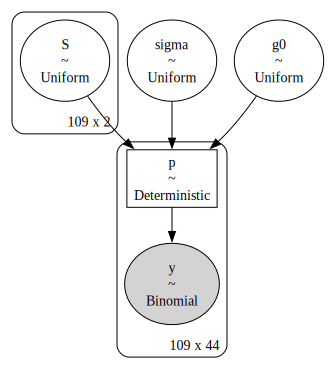

In [5]:
#| fig-cap: Visual representation of the model where $N$ is known.
#| label: fig-known

# upper bound for the uniform prior on sigma
U_SIGMA = 150

with pm.Model() as known:

    # priors for the activity centers
    S = pm.Uniform('S', (x_min, y_min), (x_max, y_max), shape=(n_detected, 2))

    # priors for the detection parameters
    g0 = pm.Uniform('g0', 0, 1)
    sigma = pm.Uniform('sigma', 0, U_SIGMA)

    # probability of capture for each individual at each trap
    distance = euclid_dist(X, S, 'pm')
    p = pm.Deterministic('p', g0 * half_normal(distance, sigma))

    # likelihood
    pm.Binomial(
        'y',
        p=p,
        n=occasion_count,
        observed=sim_Y_det
    )

pm.model_to_graphviz(known)

In [6]:
with known:
    known_idata = pm.sample(nuts_sampler='nutpie')

Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,0,0.33,15
,2000,0,0.33,15
,2000,0,0.33,15
,2000,0,0.32,15


In [7]:
az.summary(known_idata, var_names=['g0', 'sigma'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
g0,0.022,0.003,0.016,0.027,0.00,0.000,945.0,1359.0,1.0
sigma,95.080,8.146,80.790,109.932,0.35,0.339,568.0,954.0,1.0


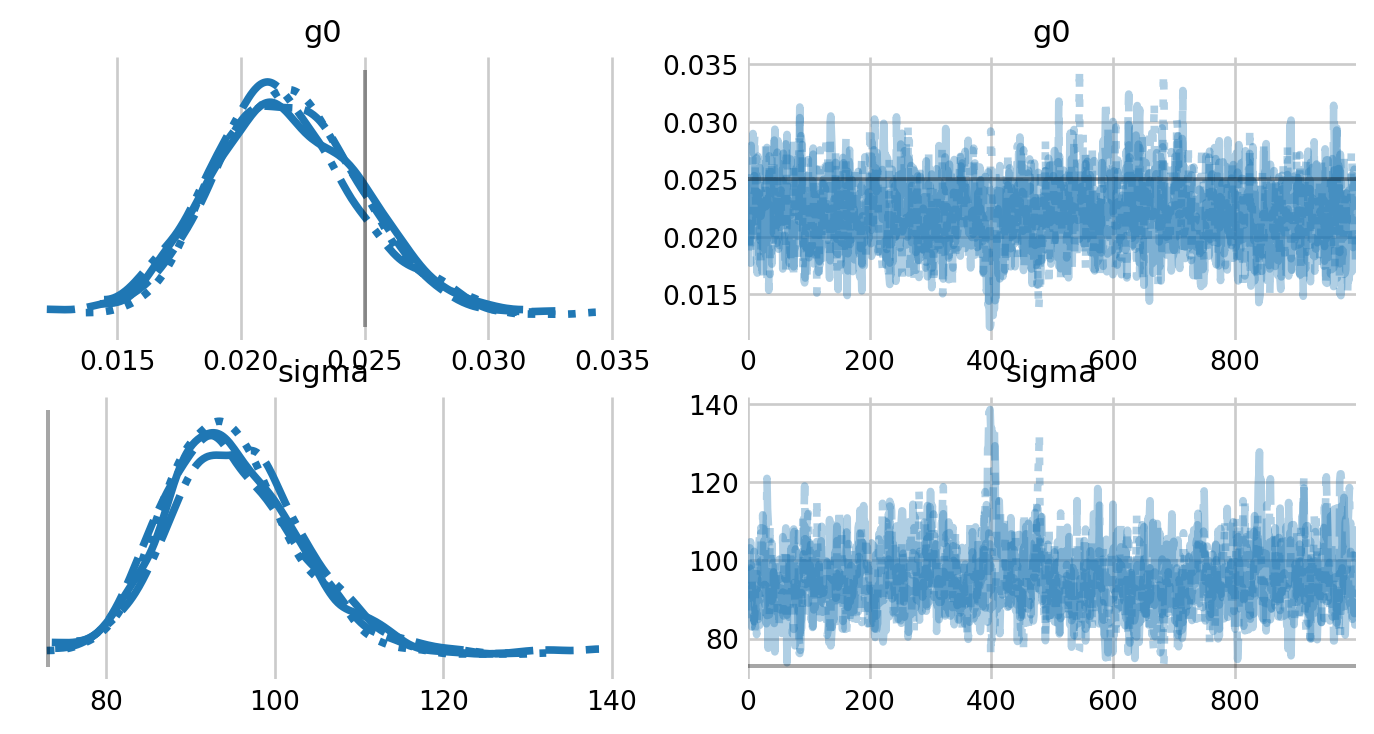

In [8]:
#| fig-cap: Trace plots for model where $N$ is known. The true parameter values are shown by vertical and horizontal lines.
#| label: fig-known_trace

az.plot_trace(
    known_idata,
    var_names=['g0', 'sigma'],
    figsize=(8,4),
    lines=[("g0", {}, [g0_true]), ("sigma", {}, [sigma_true])]
);

In [9]:
def get_Y(ch):
    '''Get a (individual_count, trap_count) array of detections.'''

    # count the number of detections per individual per trap
    detection_counts = pd.crosstab(ch.ID, ch.Net, dropna=False)

    # remove the ghost nan individual
    detection_counts = detection_counts.loc[~detection_counts.index.isna()]

    Y = detection_counts.to_numpy()
    return Y

Y = get_Y(ovenbird)
detected_count, trap_count = Y.shape

# augmented spatial capture histories with all zero histories
all_zero_history = np.zeros((M - detected_count, trap_count))
Y_augmented = np.vstack((Y, all_zero_history))

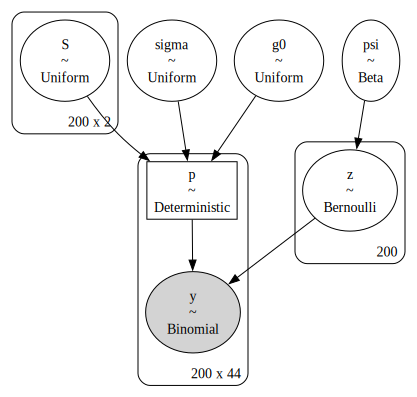

In [10]:
#| fig-cap: Visual representation of the ovenbird model using data augmentation.
#| label: fig-oven

with pm.Model() as oven:

    # Priors
    # activity centers
    S = pm.Uniform('S', (x_min, y_min), (x_max, y_max), shape=(M, 2))

    # capture parameters
    g0 = pm.Uniform('g0', 0, 1)
    sigma = pm.Uniform('sigma', 0, U_SIGMA)

    # inclusion probability
    psi = pm.Beta('psi', 0.001, 1)

    # compute the capture probability
    distance = euclid_dist(X, S, 'pm')
    p = pm.Deterministic('p', g0 * half_normal(distance, sigma))

    # inclusion state
    z = pm.Bernoulli('z', psi, shape=M)

    # likelihood
    mu_y = z[:, None] * p
    pm.Binomial('y', p=mu_y, n=occasion_count, observed=Y_augmented)

pm.model_to_graphviz(oven)

In [11]:
oven_marginal = pmx.marginalize(oven, ['z'])
with oven_marginal:
    oven_idata = pm.sample(nuts_sampler='nutpie')

Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,0,0.30,15
,2000,0,0.29,15
,2000,0,0.29,15
,2000,0,0.29,15


In [12]:
az.summary(oven_idata, var_names=['g0', 'sigma', 'psi'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
g0,0.029,0.004,0.022,0.037,0.000,0.000,1060.0,1463.0,1.01
sigma,71.510,4.746,63.028,80.301,0.188,0.123,661.0,1281.0,1.00
psi,0.701,0.057,0.592,0.804,0.001,0.001,2461.0,1874.0,1.00


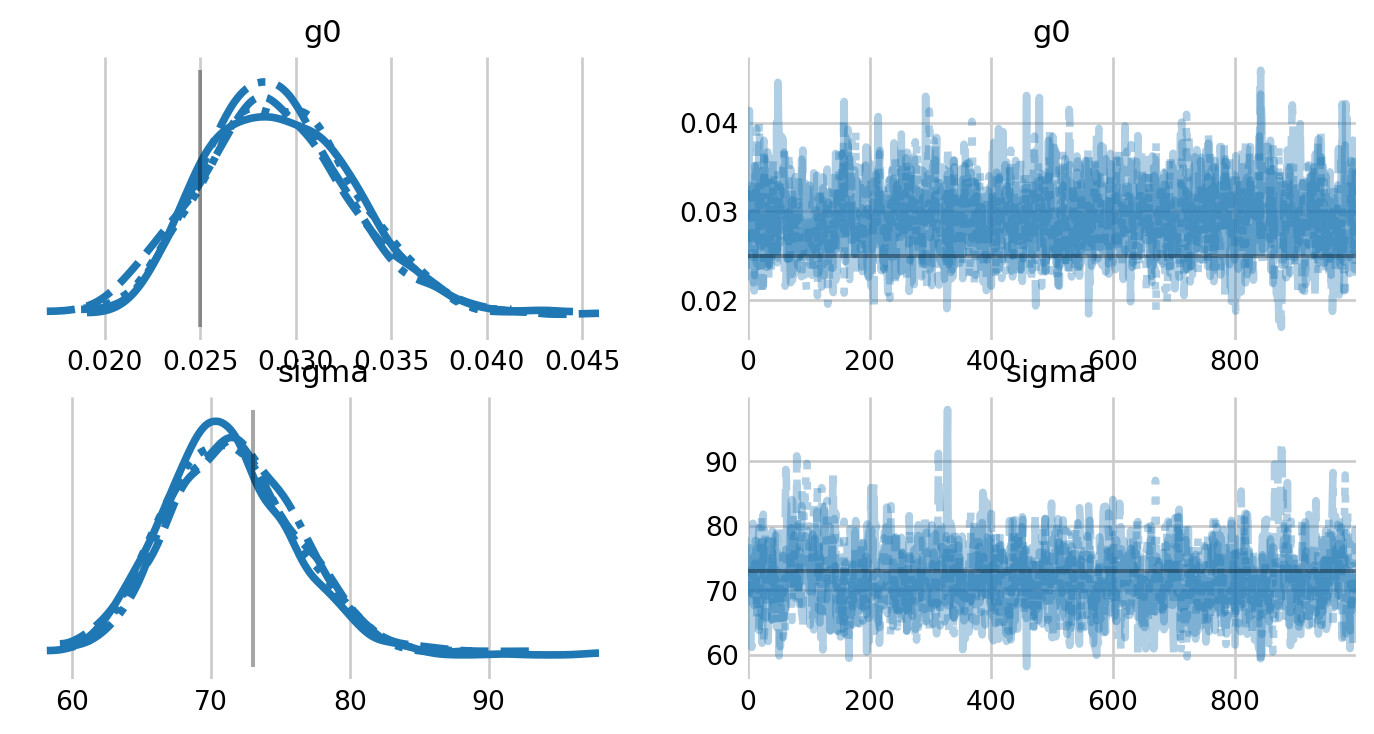

In [13]:
#| fig-cap: Trace plots for the ovenbird model using data augmentation. Maximum likelihood estimates are shown by vertical and horizontal lines.
#| label: fig-oven_trace

g0_mle = [0.025]
sigma_mle = [73]

az.plot_trace(
    oven_idata,
    var_names=['g0', 'sigma'],
    figsize=(8,4),
    lines=[("g0", {}, [g0_mle]), ("sigma", {}, [sigma_mle])]
);

In [14]:
def sim_N(idata, n, K):

    psi_samps = az.extract(idata).psi.to_numpy()
    p_samps = az.extract(idata).p
    p_samps_undet = p_samps[n:, :, :]

    bin_probs = (1 - p_samps_undet) ** K
    bin_prod = bin_probs.prod(axis=1)
    p_included = (bin_prod * psi_samps) / (bin_prod * psi_samps  + (1 - psi_samps))

    number_undetected = RNG.binomial(1, p_included).sum(axis=0)
    N_samps = n + number_undetected

    return N_samps

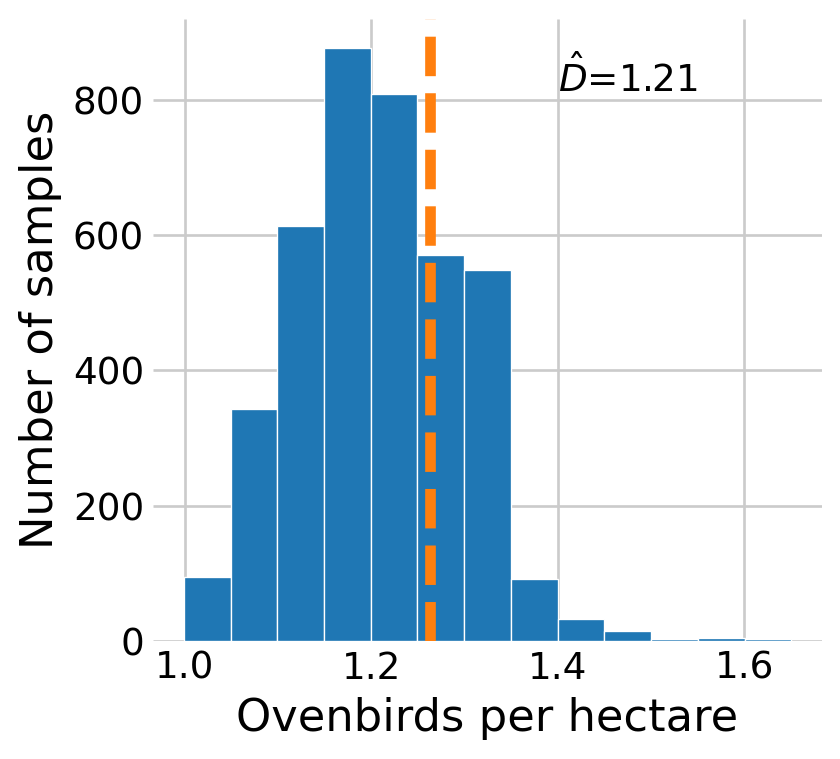

In [15]:
#| fig-cap: Posterior distribution of the density $D$ of ovenbirds. The maximum likelihood estimate is shown by the dotted red line.
#| label: fig-density

N_samps = sim_N(oven_idata, detected_count, occasion_count)

# kludgy way of calculating avergage abundance
year_count = 5
average_annual_abundance = N_samps // year_count

# area of the state space in terms of hectares
ha = 100 * 100
mask_area = (x_max - x_min) * (y_max - y_min) / ha

# density
D_samples = average_annual_abundance / mask_area
D_mle = 1.262946

fig, ax = plt.subplots(figsize=(4,4))
ax.hist(D_samples, edgecolor='white', bins=13)
ax.axvline(D_mle, linestyle='--',color='C1')
ax.set_xlabel('Ovenbirds per hectare')
ax.set_ylabel('Number of samples')
ax.text(1.4, 800, rf'$\hat{{D}}$={D_samples.mean():.2f}', va='bottom', ha='left')
plt.show()

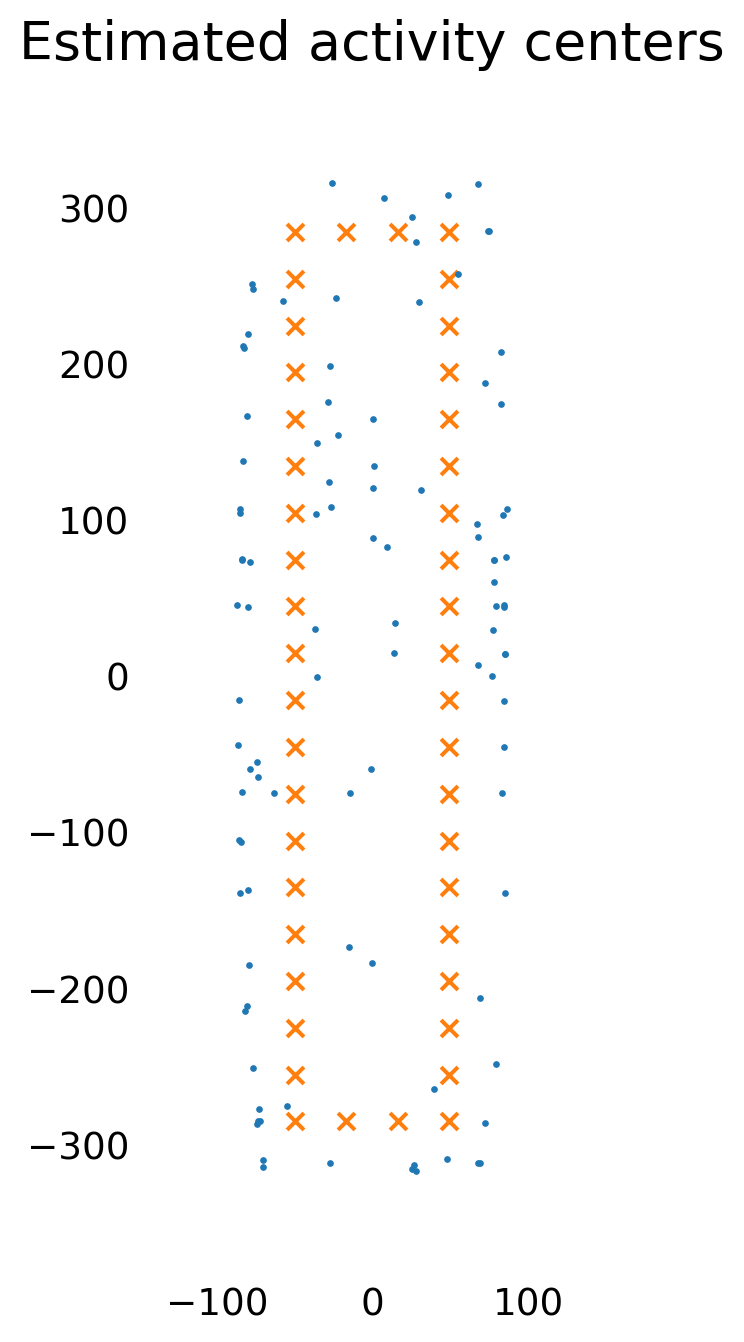

In [16]:
#| fig-cap: Estimated activity centers for the detected individuals
#| label: fig-activity

s_samps = az.extract(oven_idata).S
s_mean = np.median(s_samps[:detected_count], axis=2)

# plot the trap locations
plot_width = 3
plot_height = plot_width * scale
fig, ax = plt.subplots(figsize=(plot_width, plot_height))

# plot the traps
ax.scatter(trap_x, trap_y, marker='x', s=40, linewidth=1.5, color='C1')
ax.set_ylim((y_min, y_max))
ax.set_xlim((x_min, x_max))

# plot the mean activity centers
ax.scatter(s_mean[:, 0], s_mean[:, 1], marker='o', s=4, color='C0')

# aesthetics
ax.set_aspect('equal')
ax.set_title('Estimated activity centers')
ax.grid(False)

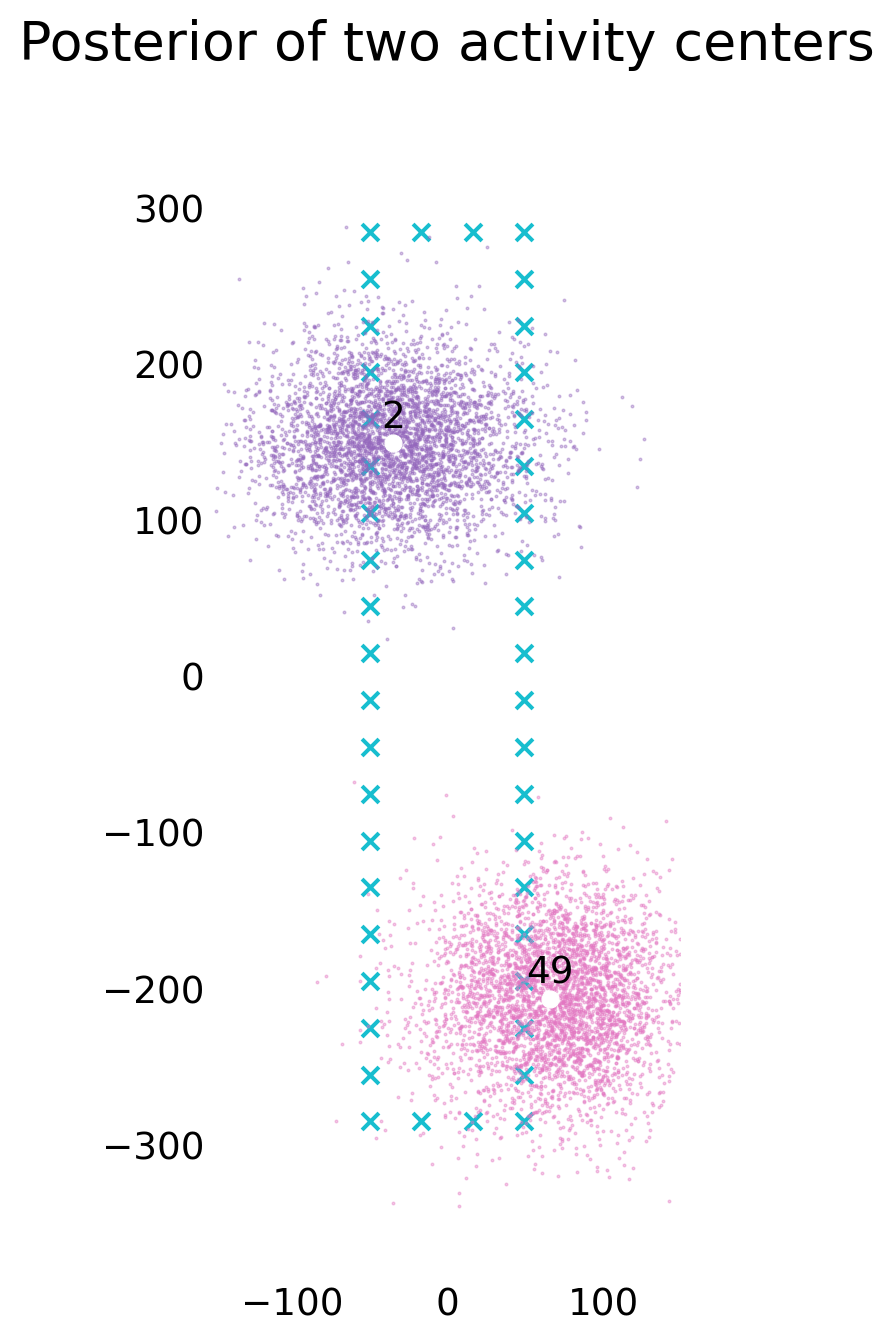

In [17]:
#| fig-cap: Posterior distributions for two activity centers.
#| label: fig-activity-post
one = 49
one_samps = s_samps[one]

two = 2
two_samps = s_samps[two]

fig, ax = plt.subplots(figsize=(plot_width, plot_height))

# plot the traps
ax.scatter(trap_x, trap_y, marker='x', s=40, linewidth=1.5, color='tab:cyan')
ax.set_ylim((y_min, y_max))
ax.set_xlim((x_min, x_max))

# plot the distributions of the activity centers
ax.scatter(one_samps[0], one_samps[1], marker='o', s=1, color='tab:pink', alpha=0.4)
ax.scatter(two_samps[0], two_samps[1], marker='o', s=1, color='tab:purple', alpha=0.4)

# plot the mean
ax.scatter(one_samps[0].mean(), one_samps[1].mean(), marker='o', s=40, color='w')
ax.scatter(two_samps[0].mean(), two_samps[1].mean(), marker='o', s=40, color='w')

# add the label
ax.text(one_samps[0].mean(), one_samps[1].mean() + 5, f'{one}', ha='center', va='bottom')
ax.text(two_samps[0].mean(), two_samps[1].mean() + 5, f'{two}', ha='center', va='bottom')

# aesthetics
ax.set_aspect('equal')
ax.set_title('Posterior of two activity centers')
ax.grid(False)
plt.show()

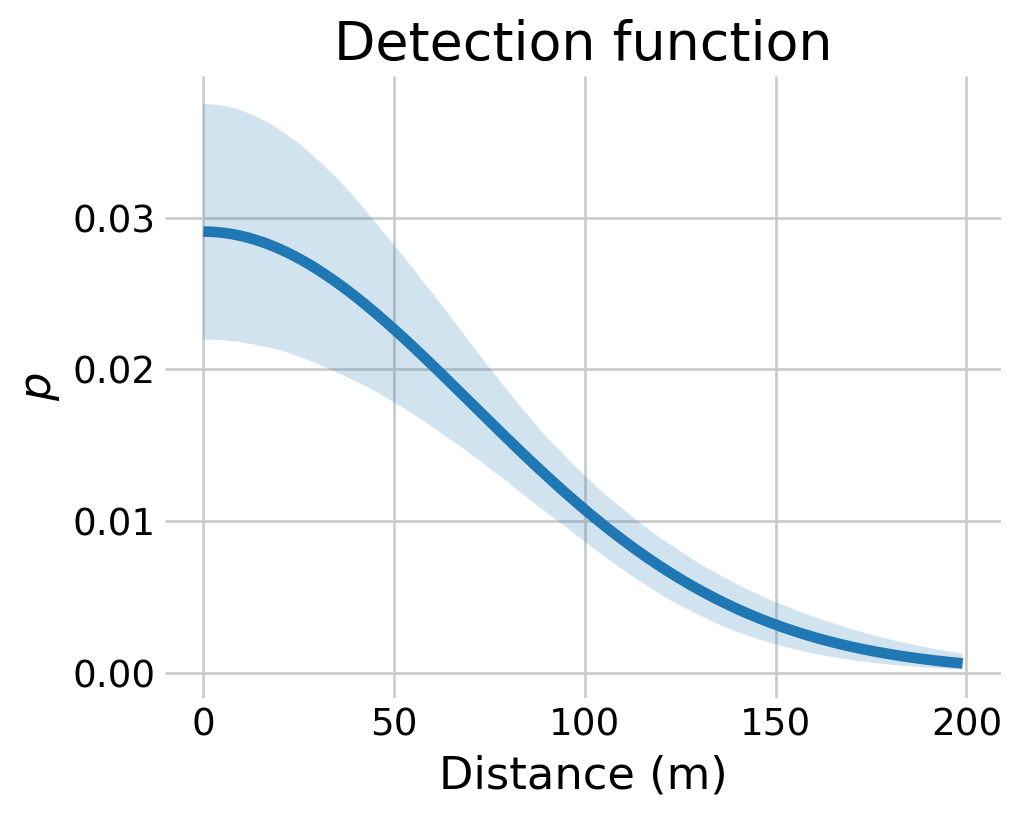

In [18]:
#| fig-cap: Posterior distribution for the detection function. The line represents the posterior mean while the shaded area is the 96% interval.
#| label: fig-func
xx = np.arange(BUFFER * 2)

sigma_samps = az.extract(oven_idata).sigma.values.flatten()
g0_samps = az.extract(oven_idata).g0.values.flatten()

p_samps = np.array(
    [g * half_normal(xx, s) for g, s in zip(g0_samps, sigma_samps)]
)

p_mean = p_samps.mean(axis=0)
p_low = np.quantile(p_samps, 0.02, axis=0)
p_high = np.quantile(p_samps, 0.98, axis=0)

fig, ax = plt.subplots(figsize=(5,4))

ax.plot(xx, p_mean, '-')
ax.fill_between(xx, p_low, p_high, alpha=0.2)

ax.set_title('Detection function')
ax.set_ylabel(r'$p$')
ax.set_xlabel(r'Distance (m)')

plt.show()

In [19]:
%load_ext watermark

%watermark -n -u -v -iv -w

Last updated: Sun Nov 09 2025

Python implementation: CPython
Python version       : 3.13.7
IPython version      : 9.6.0

matplotlib : 3.10.6
pandas     : 2.3.3
pymc       : 5.25.1
numpy      : 2.3.3
pymc_extras: 0.5.0
seaborn    : 0.13.2
pytensor   : 2.31.7
arviz      : 0.22.0

Watermark: 2.5.0

